<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/NLP/lstm_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

In [18]:
import pandas as pd
dataset=pd.read_csv('/tmp/sentiment.csv')
sentences=dataset['text'].tolist()
labels=dataset['sentiment'].tolist()
print(sentences[0:2])
print(labels[0:2])

['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case Excellent value.']
[0, 1]


In [19]:
import tensorflow_datasets as tfds
vocab_size=1000
tokenizer=tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)
tokenizer.vocab_size

999

In [20]:
print(sentences[5])
enc=tokenizer.encode(sentences[5])
dec=[]
for i in enc:
  dec.append(tokenizer.decode([i]))
print(dec)

I have to jiggle the plug to get it to line up right to get decent volume.
['I ', 'have ', 'to ', 'j', 'ig', 'gl', 'e ', 'the ', 'pl', 'ug', ' ', 'to ', 'get ', 'it ', 'to ', 'li', 'ne ', 'up ', 'right', ' ', 'to ', 'get ', 'dec', 'ent ', 'vo', 'lu', 'me', '.']


In [21]:
import numpy as np
for i,sent in enumerate(sentences):
  sentences[i]=tokenizer.encode(sentences[i])
sequences_padded=pad_sequences(sentences,padding='post',truncating='post',maxlen=30)
train_size=int(len(sentences)*0.8)
train_seq=sequences_padded[0:train_size]
test_seq=sequences_padded[train_size:]
train_label=labels[0:train_size]
test_label=labels[train_size:]

In [22]:
train_label=np.array(train_label)
test_label=np.array(test_label)

In [25]:
embed_dim=16
vocab_size=1000
maxlen=30
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=maxlen),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(6,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_seq,train_label,epochs=30,validation_data=(test_seq,test_label))

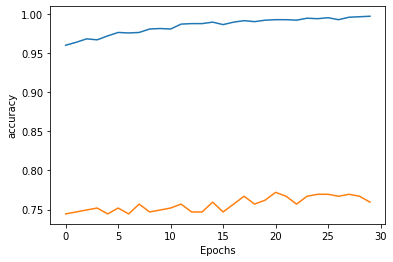

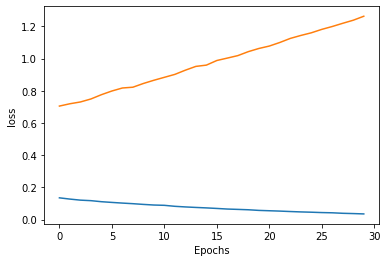

In [28]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()
plot_graph(history,'accuracy')
plot_graph(history,'loss')

In [33]:
def predict_review(model, new_sentences, maxlen=100, show_padded_sequence=True ):
  new_sequences = []
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'
  new_reviews_padded = pad_sequences(new_sequences, maxlen=100, 
                                 padding=padding_type, truncating=trunc_type)             

  classes = model.predict(new_reviews_padded)

  for x in range(len(new_sentences)):
    if (show_padded_sequence):
      print(new_reviews_padded[x])

    print(new_sentences[x])
    print(classes[x])


In [ ]:
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)


In [40]:
def fit_model_now (model, sentences) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history = model.fit(train_seq, train_label, epochs=30, 
                      validation_data=(test_seq, test_label))
  return history

def plot_results (history):
  plot_graph(history, "accuracy")
  plot_graph(history, "loss")

def fit_model_and_show_results (model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


50/50 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.5323WARNING:tensorflow:Model was constructed with shape (None, 100) for input KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='embedding_6_input'), name='embedding_6_input', description="created by layer 'embedding_6_input'"), but it was called on an input with incompatible shape (None, 30).


50/50 [==============================] - 5s 33ms/step - loss: 0.6891 - accuracy: 0.5323 - val_loss: 0.6968 - val_accuracy: 0.4436
Epoch 2/30
50/50 [==============================] - 1s 17ms/step - loss: 0.6424 - accuracy: 0.6472 - val_loss: 0.6102 - val_accuracy: 0.7544
Epoch 3/30
50/50 [==============================] - 1s 17ms/step - loss: 0.4918 - accuracy: 0.8023 - val_loss: 0.5417 - val_accuracy: 0.7444
Epoch 4/30
50/50 [==============================] - 1s 17ms/step - loss: 0.3394 - accuracy: 0.8638 - val_loss: 0.5742 - val_accuracy: 0.7268
Epoch 5/30
50/50 [==============================] - 1s 20ms/step - loss: 0.2790 - accuracy: 0.8889 - val_loss: 0.5108 - val_accuracy: 0.7644
Epoch 6/30
50/50 [==============================] - 1s 18ms/step - loss: 0.2380 - accuracy: 0.9127 - val_loss: 0.5720 - val_accuracy: 0.7619
Epoch 7/30
50/50 [==============================] - 1s 18ms/step - loss: 0.1993 - accuracy: 0.9322 - val_loss: 0.6191 - val_accuracy: 0.7644
Epoch 8/30
50/50 [======

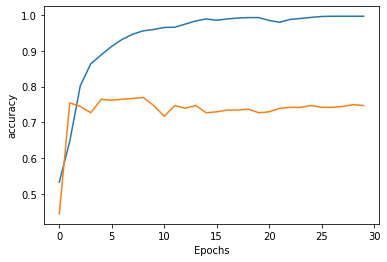

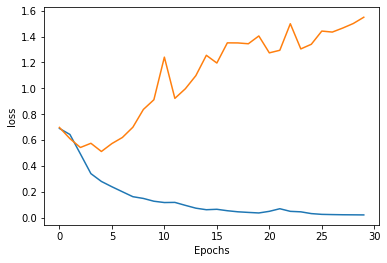

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9989773]
[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.01264283]
[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  

In [41]:
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_bidi_lstm, fake_reviews)
